In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('datasets/User_Data.csv',dtype = {'names':('User ID','Gender','Age','EstimatedSalary','Purchased'),'formats':(np.float, np.str,np.float,np.float,np.float)},delimiter = ',',skiprows = 1)

In [4]:
### Creating features and labels for train and test set
### 10% of total data used as test data
x_train1 = np.empty([int(data.shape[0]*0.9),2])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([int(data.shape[0]*0.1),2])
y_test1 = np.empty([int(data.shape[0]*0.1),1])
for i in range(0,data.shape[0]):
    if(i<data.shape[0]*0.9):
        x_train1[i,0] = data[i][2]
        x_train1[i,1] = data[i][3]
        y_train1[i,0] = data[i][4]
    else:
        x_test1[i-int(data.shape[0]*0.9),0] = data[i][2]
        x_test1[i-int(data.shape[0]*0.9),1] = data[i][3]
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][4]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(360, 2) (40, 2) (360, 1) (40, 1)


In [5]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var
y_train = y_train1
y_test = y_test1

In [6]:
## Sigmoid function
def sigmoid(x):
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i,j]<-700):              #### Used to overcome overflow error
                res[i,j] = 0.0
            else:
                res[i,j] = 1.0/(1+np.exp(-x[i,j]))
    return res

In [7]:
# Training
epochs = 5000  ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 100     ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.1   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = sigmoid(x_train[b:b+batch_size]@w)
        y_pred_t = np.reshape(y_pred,y_pred.shape[0])
        R = np.diag(y_pred_t*(1-y_pred_t))
        
        # Uncoment the next line and comment the line following that to use learning rate instead of Hermetion matrix
        
#         w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
        w = w - np.linalg.inv(x_train[b:b+batch_size].T@R@x_train[b:b+batch_size])@x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]
    
    y_pred = sigmoid(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred) + (1-y_train)*np.log(1-y_pred))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 0.6641646001095316
Epoch 1 Loss 0.6606795369067653
Epoch 2 Loss 0.6572579957117874
Epoch 3 Loss 0.6538984270589114
Epoch 4 Loss 0.650599334297606
Epoch 5 Loss 0.6473592712858465
Epoch 6 Loss 0.6441768402063869
Epoch 7 Loss 0.6410506894982226
Epoch 8 Loss 0.6379795118960795
Epoch 9 Loss 0.6349620425712725
Epoch 10 Loss 0.6319970573677485
Epoch 11 Loss 0.6290833711275629
Epoch 12 Loss 0.6262198361004383
Epoch 13 Loss 0.6234053404324207
Epoch 14 Loss 0.6206388067289893
Epoch 15 Loss 0.617919190688291
Epoch 16 Loss 0.6152454798004551
Epoch 17 Loss 0.6126166921092191
Epoch 18 Loss 0.6100318750323387
Epoch 19 Loss 0.6074901042374857
Epoch 20 Loss 0.6049904825705527
Epoch 21 Loss 0.6025321390334778
Epoch 22 Loss 0.6001142278088871
Epoch 23 Loss 0.5977359273290216
Epoch 24 Loss 0.5953964393865742
Epoch 25 Loss 0.5930949882852093
Epoch 26 Loss 0.5908308200276708
Epoch 27 Loss 0.5886032015395173
Epoch 28 Loss 0.5864114199266351
Epoch 29 Loss 0.584254781764796
Epoch 30 Loss 0.5821326

Epoch 299 Loss 0.4760147459419806
Epoch 300 Loss 0.4762355961063177
Epoch 301 Loss 0.47645734399194356
Epoch 302 Loss 0.4766799673797245
Epoch 303 Loss 0.47690344419657577
Epoch 304 Loss 0.47712775251554435
Epoch 305 Loss 0.47735287055589887
Epoch 306 Loss 0.4775787766832288
Epoch 307 Loss 0.47780544940955283
Epoch 308 Loss 0.4780328673934327
Epoch 309 Loss 0.47826100944009564
Epoch 310 Loss 0.4784898545015625
Epoch 311 Loss 0.4787193816767812
Epoch 312 Loss 0.4789495702117662
Epoch 313 Loss 0.47918039949974056
Epoch 314 Loss 0.4794118490812848
Epoch 315 Loss 0.4796438986444866
Epoch 316 Loss 0.47987652802509473
Epoch 317 Loss 0.4801097172066747
Epoch 318 Loss 0.4803434463207658
Epoch 319 Loss 0.4805776956470411
Epoch 320 Loss 0.4808124456134654
Epoch 321 Loss 0.48104767679645655
Epoch 322 Loss 0.48128336992104287
Epoch 323 Loss 0.48151950586102366
Epoch 324 Loss 0.4817560656391261
Epoch 325 Loss 0.48199303042716
Epoch 326 Loss 0.48223038154617187
Epoch 327 Loss 0.4824681004665961
Epoc

Epoch 571 Loss 0.5269527474143365
Epoch 572 Loss 0.5270468007070974
Epoch 573 Loss 0.5271402220965181
Epoch 574 Loss 0.5272330146756935
Epoch 575 Loss 0.5273251815407558
Epoch 576 Loss 0.5274167257905407
Epoch 577 Loss 0.5275076505262075
Epoch 578 Loss 0.5275979588509243
Epoch 579 Loss 0.5276876538695066
Epoch 580 Loss 0.5277767386880957
Epoch 581 Loss 0.5278652164138276
Epoch 582 Loss 0.5279530901545052
Epoch 583 Loss 0.5280403630182902
Epoch 584 Loss 0.5281270381133816
Epoch 585 Loss 0.5282131185477165
Epoch 586 Loss 0.5282986074286582
Epoch 587 Loss 0.5283835078627082
Epoch 588 Loss 0.5284678229552171
Epoch 589 Loss 0.5285515558100887
Epoch 590 Loss 0.5286347095295049
Epoch 591 Loss 0.5287172872136436
Epoch 592 Loss 0.5287992919604211
Epoch 593 Loss 0.5288807268652047
Epoch 594 Loss 0.5289615950205722
Epoch 595 Loss 0.5290418995160375
Epoch 596 Loss 0.5291216434378126
Epoch 597 Loss 0.529200829868548
Epoch 598 Loss 0.5292794618871024
Epoch 599 Loss 0.529357542568295
Epoch 600 Loss 0

Epoch 879 Loss 0.5384125661806529
Epoch 880 Loss 0.5384212196477433
Epoch 881 Loss 0.538429802333256
Epoch 882 Loss 0.5384383148069158
Epoch 883 Loss 0.5384467576340125
Epoch 884 Loss 0.5384551313754288
Epoch 885 Loss 0.5384634365876857
Epoch 886 Loss 0.5384716738229637
Epoch 887 Loss 0.5384798436291319
Epoch 888 Loss 0.5384879465497867
Epoch 889 Loss 0.5384959831242874
Epoch 890 Loss 0.5385039538877668
Epoch 891 Loss 0.5385118593711784
Epoch 892 Loss 0.5385197001013295
Epoch 893 Loss 0.5385274766008956
Epoch 894 Loss 0.5385351893884728
Epoch 895 Loss 0.5385428389785823
Epoch 896 Loss 0.5385504258817211
Epoch 897 Loss 0.5385579506043784
Epoch 898 Loss 0.5385654136490702
Epoch 899 Loss 0.5385728155143765
Epoch 900 Loss 0.5385801566949497
Epoch 901 Loss 0.538587437681563
Epoch 902 Loss 0.5385946589611305
Epoch 903 Loss 0.5386018210167373
Epoch 904 Loss 0.5386089243276708
Epoch 905 Loss 0.5386159693694337
Epoch 906 Loss 0.538622956613799
Epoch 907 Loss 0.5386298865288179
Epoch 908 Loss 0.

Epoch 1190 Loss 0.5393832569409812
Epoch 1191 Loss 0.5393839123208507
Epoch 1192 Loss 0.5393845622609897
Epoch 1193 Loss 0.5393852068064943
Epoch 1194 Loss 0.5393858460020913
Epoch 1195 Loss 0.5393864798921411
Epoch 1196 Loss 0.5393871085206201
Epoch 1197 Loss 0.5393877319311557
Epoch 1198 Loss 0.539388350167014
Epoch 1199 Loss 0.5393889632711004
Epoch 1200 Loss 0.5393895712859618
Epoch 1201 Loss 0.5393901742537999
Epoch 1202 Loss 0.5393907722164583
Epoch 1203 Loss 0.5393913652154437
Epoch 1204 Loss 0.5393919532919217
Epoch 1205 Loss 0.5393925364866982
Epoch 1206 Loss 0.5393931148402605
Epoch 1207 Loss 0.5393936883927591
Epoch 1208 Loss 0.5393942571840034
Epoch 1209 Loss 0.5393948212534715
Epoch 1210 Loss 0.5393953806403342
Epoch 1211 Loss 0.5393959353834128
Epoch 1212 Loss 0.5393964855212259
Epoch 1213 Loss 0.5393970310919687
Epoch 1214 Loss 0.539397572133511
Epoch 1215 Loss 0.5393981086834241
Epoch 1216 Loss 0.5393986407789533
Epoch 1217 Loss 0.5393991684570533
Epoch 1218 Loss 0.5393

Epoch 1437 Loss 0.5394521190770347
Epoch 1438 Loss 0.5394522026006967
Epoch 1439 Loss 0.5394522854303884
Epoch 1440 Loss 0.5394523675718782
Epoch 1441 Loss 0.5394524490308734
Epoch 1442 Loss 0.5394525298130589
Epoch 1443 Loss 0.5394526099240454
Epoch 1444 Loss 0.5394526893694147
Epoch 1445 Loss 0.5394527681546988
Epoch 1446 Loss 0.5394528462853718
Epoch 1447 Loss 0.5394529237668791
Epoch 1448 Loss 0.5394530006046142
Epoch 1449 Loss 0.5394530768039217
Epoch 1450 Loss 0.5394531523701082
Epoch 1451 Loss 0.5394532273084323
Epoch 1452 Loss 0.5394533016241093
Epoch 1453 Loss 0.5394533753223127
Epoch 1454 Loss 0.5394534484081752
Epoch 1455 Loss 0.5394535208867773
Epoch 1456 Loss 0.5394535927631697
Epoch 1457 Loss 0.5394536640423516
Epoch 1458 Loss 0.5394537347292913
Epoch 1459 Loss 0.5394538048288987
Epoch 1460 Loss 0.539453874346061
Epoch 1461 Loss 0.5394539432856137
Epoch 1462 Loss 0.5394540116523577
Epoch 1463 Loss 0.5394540794510495
Epoch 1464 Loss 0.5394541466864115
Epoch 1465 Loss 0.539

Epoch 1762 Loss 0.5394615034071661
Epoch 1763 Loss 0.5394615089542315
Epoch 1764 Loss 0.5394615144552056
Epoch 1765 Loss 0.5394615199104656
Epoch 1766 Loss 0.5394615253203938
Epoch 1767 Loss 0.5394615306853656
Epoch 1768 Loss 0.539461536005758
Epoch 1769 Loss 0.5394615412819366
Epoch 1770 Loss 0.5394615465142694
Epoch 1771 Loss 0.5394615517031235
Epoch 1772 Loss 0.5394615568488609
Epoch 1773 Loss 0.5394615619518394
Epoch 1774 Loss 0.5394615670124091
Epoch 1775 Loss 0.539461572030928
Epoch 1776 Loss 0.5394615770077449
Epoch 1777 Loss 0.5394615819432048
Epoch 1778 Loss 0.539461586837652
Epoch 1779 Loss 0.5394615916914299
Epoch 1780 Loss 0.5394615965048678
Epoch 1781 Loss 0.5394616012783102
Epoch 1782 Loss 0.5394616060120869
Epoch 1783 Loss 0.5394616107065215
Epoch 1784 Loss 0.5394616153619558
Epoch 1785 Loss 0.5394616199786966
Epoch 1786 Loss 0.5394616245570745
Epoch 1787 Loss 0.5394616290974048
Epoch 1788 Loss 0.5394616336000092
Epoch 1789 Loss 0.5394616380651975
Epoch 1790 Loss 0.53946

Epoch 2042 Loss 0.5394621064080182
Epoch 2043 Loss 0.5394621069442366
Epoch 2044 Loss 0.5394621074759994
Epoch 2045 Loss 0.5394621080033405
Epoch 2046 Loss 0.5394621085263037
Epoch 2047 Loss 0.5394621090449174
Epoch 2048 Loss 0.5394621095592244
Epoch 2049 Loss 0.5394621100692566
Epoch 2050 Loss 0.5394621105750492
Epoch 2051 Loss 0.5394621110766402
Epoch 2052 Loss 0.5394621115740564
Epoch 2053 Loss 0.5394621120673478
Epoch 2054 Loss 0.539462112556536
Epoch 2055 Loss 0.5394621130416641
Epoch 2056 Loss 0.539462113522757
Epoch 2057 Loss 0.539462113999847
Epoch 2058 Loss 0.539462114472977
Epoch 2059 Loss 0.5394621149421762
Epoch 2060 Loss 0.5394621154074766
Epoch 2061 Loss 0.5394621158689102
Epoch 2062 Loss 0.5394621163265081
Epoch 2063 Loss 0.5394621167803024
Epoch 2064 Loss 0.5394621172303303
Epoch 2065 Loss 0.5394621176766168
Epoch 2066 Loss 0.5394621181191946
Epoch 2067 Loss 0.5394621185580901
Epoch 2068 Loss 0.5394621189933443
Epoch 2069 Loss 0.5394621194249801
Epoch 2070 Loss 0.539462

Epoch 2360 Loss 0.539462166392985
Epoch 2361 Loss 0.5394621664307335
Epoch 2362 Loss 0.5394621664681682
Epoch 2363 Loss 0.5394621665052921
Epoch 2364 Loss 0.539462166542107
Epoch 2365 Loss 0.5394621665786143
Epoch 2366 Loss 0.5394621666148227
Epoch 2367 Loss 0.5394621666507285
Epoch 2368 Loss 0.5394621666863334
Epoch 2369 Loss 0.5394621667216458
Epoch 2370 Loss 0.5394621667566614
Epoch 2371 Loss 0.539462166791389
Epoch 2372 Loss 0.5394621668258278
Epoch 2373 Loss 0.5394621668599777
Epoch 2374 Loss 0.5394621668938494
Epoch 2375 Loss 0.5394621669274351
Epoch 2376 Loss 0.5394621669607421
Epoch 2377 Loss 0.539462166993773
Epoch 2378 Loss 0.5394621670265298
Epoch 2379 Loss 0.5394621670590111
Epoch 2380 Loss 0.5394621670912275
Epoch 2381 Loss 0.5394621671231729
Epoch 2382 Loss 0.5394621671548536
Epoch 2383 Loss 0.5394621671862738
Epoch 2384 Loss 0.5394621672174292
Epoch 2385 Loss 0.5394621672483246
Epoch 2386 Loss 0.5394621672789683
Epoch 2387 Loss 0.5394621673093531
Epoch 2388 Loss 0.539462

Epoch 2631 Loss 0.5394621704622391
Epoch 2632 Loss 0.5394621704661713
Epoch 2633 Loss 0.5394621704700748
Epoch 2634 Loss 0.5394621704739403
Epoch 2635 Loss 0.5394621704777778
Epoch 2636 Loss 0.5394621704815794
Epoch 2637 Loss 0.5394621704853535
Epoch 2638 Loss 0.5394621704890958
Epoch 2639 Loss 0.5394621704928078
Epoch 2640 Loss 0.5394621704964858
Epoch 2641 Loss 0.5394621705001351
Epoch 2642 Loss 0.5394621705037529
Epoch 2643 Loss 0.5394621705073437
Epoch 2644 Loss 0.539462170510901
Epoch 2645 Loss 0.5394621705144302
Epoch 2646 Loss 0.5394621705179294
Epoch 2647 Loss 0.5394621705214006
Epoch 2648 Loss 0.5394621705248397
Epoch 2649 Loss 0.5394621705282574
Epoch 2650 Loss 0.5394621705316397
Epoch 2651 Loss 0.5394621705349976
Epoch 2652 Loss 0.5394621705383276
Epoch 2653 Loss 0.5394621705416276
Epoch 2654 Loss 0.5394621705449039
Epoch 2655 Loss 0.5394621705481496
Epoch 2656 Loss 0.5394621705513697
Epoch 2657 Loss 0.5394621705545626
Epoch 2658 Loss 0.5394621705577284
Epoch 2659 Loss 0.539

Epoch 2893 Loss 0.5394621708824303
Epoch 2894 Loss 0.5394621708828695
Epoch 2895 Loss 0.5394621708833085
Epoch 2896 Loss 0.5394621708837447
Epoch 2897 Loss 0.5394621708841748
Epoch 2898 Loss 0.5394621708846015
Epoch 2899 Loss 0.5394621708850273
Epoch 2900 Loss 0.5394621708854465
Epoch 2901 Loss 0.5394621708858647
Epoch 2902 Loss 0.5394621708862763
Epoch 2903 Loss 0.5394621708866841
Epoch 2904 Loss 0.53946217088709
Epoch 2905 Loss 0.5394621708874956
Epoch 2906 Loss 0.5394621708878948
Epoch 2907 Loss 0.539462170888293
Epoch 2908 Loss 0.5394621708886852
Epoch 2909 Loss 0.5394621708890739
Epoch 2910 Loss 0.5394621708894598
Epoch 2911 Loss 0.5394621708898429
Epoch 2912 Loss 0.539462170890224
Epoch 2913 Loss 0.5394621708906006
Epoch 2914 Loss 0.5394621708909765
Epoch 2915 Loss 0.5394621708913492
Epoch 2916 Loss 0.5394621708917123
Epoch 2917 Loss 0.5394621708920796
Epoch 2918 Loss 0.539462170892441
Epoch 2919 Loss 0.5394621708928017
Epoch 2920 Loss 0.5394621708931556
Epoch 2921 Loss 0.5394621

Epoch 3151 Loss 0.5394621709294252
Epoch 3152 Loss 0.539462170929479
Epoch 3153 Loss 0.5394621709295288
Epoch 3154 Loss 0.5394621709295802
Epoch 3155 Loss 0.5394621709296297
Epoch 3156 Loss 0.5394621709296819
Epoch 3157 Loss 0.5394621709297275
Epoch 3158 Loss 0.5394621709297789
Epoch 3159 Loss 0.5394621709298258
Epoch 3160 Loss 0.5394621709298734
Epoch 3161 Loss 0.5394621709299215
Epoch 3162 Loss 0.5394621709299688
Epoch 3163 Loss 0.5394621709300155
Epoch 3164 Loss 0.5394621709300632
Epoch 3165 Loss 0.5394621709301077
Epoch 3166 Loss 0.5394621709301514
Epoch 3167 Loss 0.5394621709302002
Epoch 3168 Loss 0.5394621709302451
Epoch 3169 Loss 0.5394621709302883
Epoch 3170 Loss 0.5394621709303357
Epoch 3171 Loss 0.5394621709303773
Epoch 3172 Loss 0.5394621709304208
Epoch 3173 Loss 0.539462170930463
Epoch 3174 Loss 0.5394621709305062
Epoch 3175 Loss 0.539462170930549
Epoch 3176 Loss 0.5394621709305908
Epoch 3177 Loss 0.5394621709306321
Epoch 3178 Loss 0.5394621709306722
Epoch 3179 Loss 0.53946

Epoch 3430 Loss 0.5394621709349998
Epoch 3431 Loss 0.5394621709350061
Epoch 3432 Loss 0.5394621709350094
Epoch 3433 Loss 0.539462170935018
Epoch 3434 Loss 0.5394621709350224
Epoch 3435 Loss 0.5394621709350275
Epoch 3436 Loss 0.5394621709350308
Epoch 3437 Loss 0.5394621709350341
Epoch 3438 Loss 0.5394621709350401
Epoch 3439 Loss 0.5394621709350437
Epoch 3440 Loss 0.5394621709350512
Epoch 3441 Loss 0.5394621709350544
Epoch 3442 Loss 0.5394621709350592
Epoch 3443 Loss 0.5394621709350642
Epoch 3444 Loss 0.5394621709350673
Epoch 3445 Loss 0.5394621709350704
Epoch 3446 Loss 0.5394621709350764
Epoch 3447 Loss 0.5394621709350793
Epoch 3448 Loss 0.5394621709350863
Epoch 3449 Loss 0.5394621709350902
Epoch 3450 Loss 0.5394621709350942
Epoch 3451 Loss 0.5394621709350987
Epoch 3452 Loss 0.5394621709351016
Epoch 3453 Loss 0.5394621709351048
Epoch 3454 Loss 0.5394621709351104
Epoch 3455 Loss 0.5394621709351134
Epoch 3456 Loss 0.5394621709351198
Epoch 3457 Loss 0.5394621709351234
Epoch 3458 Loss 0.539

Epoch 3690 Loss 0.5394621709355334
Epoch 3691 Loss 0.539462170935537
Epoch 3692 Loss 0.5394621709355374
Epoch 3693 Loss 0.5394621709355377
Epoch 3694 Loss 0.539462170935538
Epoch 3695 Loss 0.5394621709355383
Epoch 3696 Loss 0.5394621709355392
Epoch 3697 Loss 0.5394621709355394
Epoch 3698 Loss 0.5394621709355398
Epoch 3699 Loss 0.5394621709355399
Epoch 3700 Loss 0.5394621709355414
Epoch 3701 Loss 0.5394621709355416
Epoch 3702 Loss 0.5394621709355418
Epoch 3703 Loss 0.5394621709355422
Epoch 3704 Loss 0.5394621709355424
Epoch 3705 Loss 0.5394621709355427
Epoch 3706 Loss 0.539462170935543
Epoch 3707 Loss 0.539462170935544
Epoch 3708 Loss 0.5394621709355445
Epoch 3709 Loss 0.5394621709355446
Epoch 3710 Loss 0.5394621709355449
Epoch 3711 Loss 0.5394621709355458
Epoch 3712 Loss 0.5394621709355462
Epoch 3713 Loss 0.5394621709355463
Epoch 3714 Loss 0.5394621709355468
Epoch 3715 Loss 0.539462170935547
Epoch 3716 Loss 0.5394621709355474
Epoch 3717 Loss 0.5394621709355476
Epoch 3718 Loss 0.5394621

Epoch 4041 Loss 0.5394621709355979
Epoch 4042 Loss 0.5394621709355979
Epoch 4043 Loss 0.5394621709355979
Epoch 4044 Loss 0.5394621709355979
Epoch 4045 Loss 0.5394621709355978
Epoch 4046 Loss 0.5394621709355978
Epoch 4047 Loss 0.5394621709355978
Epoch 4048 Loss 0.5394621709355978
Epoch 4049 Loss 0.5394621709355978
Epoch 4050 Loss 0.5394621709355978
Epoch 4051 Loss 0.5394621709355978
Epoch 4052 Loss 0.5394621709355979
Epoch 4053 Loss 0.5394621709355979
Epoch 4054 Loss 0.5394621709355979
Epoch 4055 Loss 0.5394621709355979
Epoch 4056 Loss 0.5394621709355979
Epoch 4057 Loss 0.5394621709355979
Epoch 4058 Loss 0.5394621709355979
Epoch 4059 Loss 0.5394621709355977
Epoch 4060 Loss 0.5394621709355977
Epoch 4061 Loss 0.5394621709355977
Epoch 4062 Loss 0.5394621709355978
Epoch 4063 Loss 0.5394621709355978
Epoch 4064 Loss 0.5394621709355978
Epoch 4065 Loss 0.5394621709355978
Epoch 4066 Loss 0.5394621709355978
Epoch 4067 Loss 0.5394621709355977
Epoch 4068 Loss 0.5394621709355977
Epoch 4069 Loss 0.53

Epoch 4373 Loss 0.5394621709355975
Epoch 4374 Loss 0.5394621709355975
Epoch 4375 Loss 0.5394621709355975
Epoch 4376 Loss 0.5394621709355975
Epoch 4377 Loss 0.5394621709355975
Epoch 4378 Loss 0.5394621709355975
Epoch 4379 Loss 0.5394621709355975
Epoch 4380 Loss 0.5394621709355975
Epoch 4381 Loss 0.5394621709355975
Epoch 4382 Loss 0.5394621709355975
Epoch 4383 Loss 0.5394621709355975
Epoch 4384 Loss 0.5394621709355975
Epoch 4385 Loss 0.5394621709355975
Epoch 4386 Loss 0.5394621709355975
Epoch 4387 Loss 0.5394621709355975
Epoch 4388 Loss 0.5394621709355975
Epoch 4389 Loss 0.5394621709355975
Epoch 4390 Loss 0.5394621709355975
Epoch 4391 Loss 0.5394621709355975
Epoch 4392 Loss 0.5394621709355975
Epoch 4393 Loss 0.5394621709355975
Epoch 4394 Loss 0.5394621709355975
Epoch 4395 Loss 0.5394621709355975
Epoch 4396 Loss 0.5394621709355975
Epoch 4397 Loss 0.5394621709355975
Epoch 4398 Loss 0.5394621709355975
Epoch 4399 Loss 0.5394621709355975
Epoch 4400 Loss 0.5394621709355975
Epoch 4401 Loss 0.53

Epoch 4721 Loss 0.5394621709355975
Epoch 4722 Loss 0.5394621709355975
Epoch 4723 Loss 0.5394621709355975
Epoch 4724 Loss 0.5394621709355975
Epoch 4725 Loss 0.5394621709355975
Epoch 4726 Loss 0.5394621709355975
Epoch 4727 Loss 0.5394621709355975
Epoch 4728 Loss 0.5394621709355975
Epoch 4729 Loss 0.5394621709355975
Epoch 4730 Loss 0.5394621709355975
Epoch 4731 Loss 0.5394621709355975
Epoch 4732 Loss 0.5394621709355975
Epoch 4733 Loss 0.5394621709355975
Epoch 4734 Loss 0.5394621709355975
Epoch 4735 Loss 0.5394621709355975
Epoch 4736 Loss 0.5394621709355975
Epoch 4737 Loss 0.5394621709355975
Epoch 4738 Loss 0.5394621709355975
Epoch 4739 Loss 0.5394621709355975
Epoch 4740 Loss 0.5394621709355975
Epoch 4741 Loss 0.5394621709355975
Epoch 4742 Loss 0.5394621709355975
Epoch 4743 Loss 0.5394621709355975
Epoch 4744 Loss 0.5394621709355975
Epoch 4745 Loss 0.5394621709355975
Epoch 4746 Loss 0.5394621709355975
Epoch 4747 Loss 0.5394621709355975
Epoch 4748 Loss 0.5394621709355975
Epoch 4749 Loss 0.53

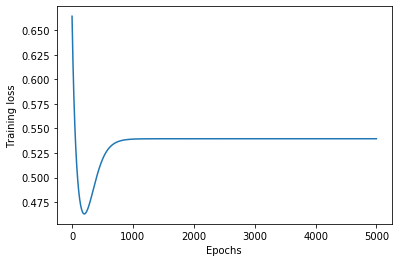

In [8]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [9]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [10]:
## Predicting on test set and finding accuracy on test set
print("Predicting on test set")
y_hat = sigmoid(x_test@w)
loss = -np.sum(y_test*np.log(y_hat) + (1-y_test)*np.log(1-y_hat))/y_hat.shape[0]
print("Testing loss =",loss)
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]<0.5):
        y_hat[i] = 0
    else:
        y_hat[i] = 1
tot = 0.0
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]==y_test[i]):
        tot+=1   
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.40697423317868087
Testing accuracy = 77.5 %
